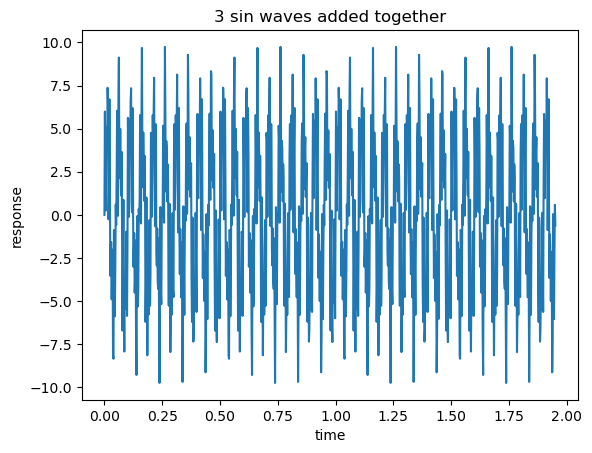

In [1]:
# periodogram stuff
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# added 3 sin waves with a freq of 20, 100, and 150 together
fs = nfft = 512
t = np.arange(1000) / fs
x = np.sin(2*np.pi*20*t)*5 + np.sin(2*np.pi*100*t)*2 + np.sin(2*np.pi*150*t)*3

#ploting
plt.plot(t,x)
plt.ylabel('response')
plt.xlabel('time')
plt.title('3 sin waves added together')
plt.show()

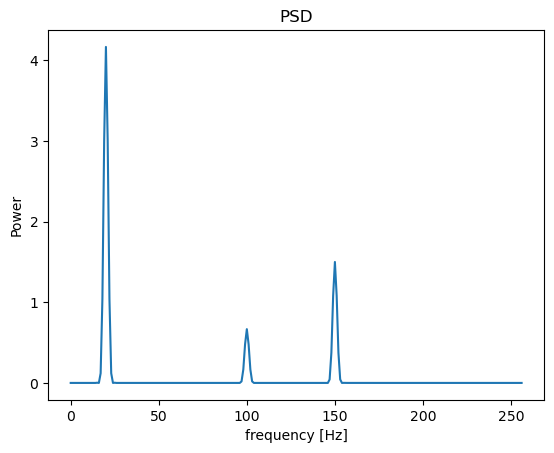

In [2]:
fs = nfft = 512
t = np.arange(1000) / fs
freq, psd = signal.welch(x,fs,nfft=nfft)
plt.plot(freq, psd)
plt.xlabel('frequency [Hz]')
plt.ylabel('Power')
plt.title('PSD')
plt.show()

# That is a simple example now lets thing of a more neural example

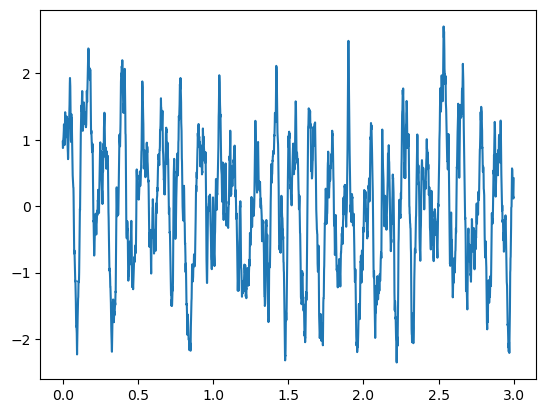

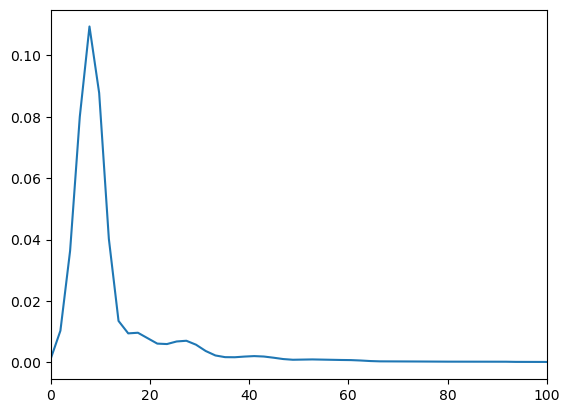

In [11]:
# Import sim functions
from neurodsp.sim.combined import sim_combined
from neurodsp.utils import set_random_seed

# Import utilities for plotting data
from neurodsp.utils import create_times

# Set the random seed, for consistency simulating data
set_random_seed(0)

# Set some general settings, to be used across all simulations
fs = 1000
n_seconds = 3
times = create_times(n_seconds, fs)

# Define the components of the combined signal to simulate
components = {'sim_synaptic_current' : {'n_neurons' : 1000, 'firing_rate' : 2, 't_ker' : 1.0,
                                        'tau_r' : 0.002, 'tau_d' : 0.02},
              'sim_oscillation' : {'freq' : 8}}

# Simulate an oscillation over an aperiodic component
signals = sim_combined(n_seconds, fs, components)

plt.plot(times,signals)
plt.show()

freq, psd = signal.welch(signals,fs,nfft=nfft)
plt.plot(freq,psd)
plt.xlim(0,100)
plt.show()



# builds and example LFP recording. By looking at raw data impossible to see if there is any dominant frequecies or what they could be. With the PSD it is very clear that there is a large bump at theta. May replace this example with this data from LA model

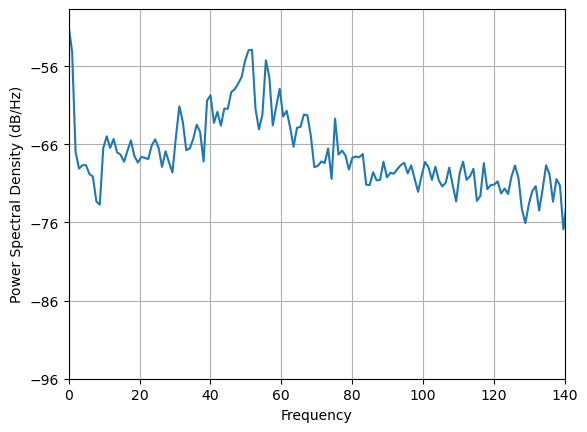

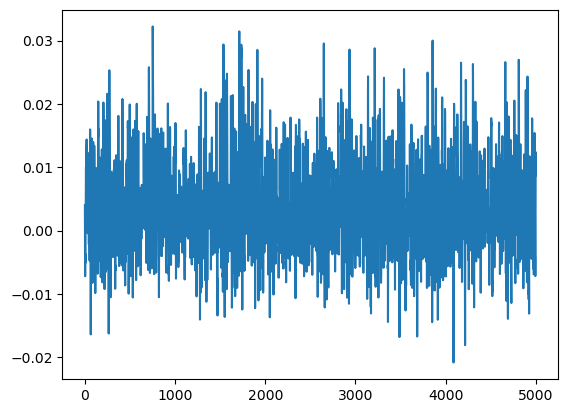

In [40]:
import h5py
f = h5py.File('ecp.h5','r')
data = f['ecp']['data'][50000:][::10].reshape(-1,)
freq, psd = plt.psd(data, NFFT=1024, Fs=1000)
plt.xlim(0,140)
plt.show()
plt.plot(data)